In [22]:
import numpy
import tensorflow as tf
mnist = tf.keras.datasets.mnist

print(tf.__version__)
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation="softmax")
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', 
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)


model.evaluate(x_test, y_test, verbose = 2)



2.1.0


NameError: name 'true' is not defined

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.layers

In [6]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [7]:
weights

array([[-0.07553029, -0.01937864, -0.02145803, ...,  0.01671206,
         0.02536932,  0.0745137 ],
       [ 0.07384869, -0.05080631,  0.00910176, ..., -0.03277544,
        -0.0408614 ,  0.06652523],
       [-0.01812728,  0.01746113,  0.05932837, ..., -0.01577701,
         0.06152032,  0.00073408],
       ...,
       [-0.01696216,  0.02687746,  0.01035558, ..., -0.0153465 ,
        -0.02315231, -0.01900965],
       [-0.01576257, -0.01945433, -0.02151283, ..., -0.0245958 ,
        -0.03881798,  0.05069547],
       [-0.00685057, -0.04131247,  0.02287042, ..., -0.06282207,
         0.07633585, -0.03029801]], dtype=float32)

In [8]:
biases

array([-0.06622189, -0.03061732,  0.0962502 , -0.33209768,  0.03770189,
        0.13777861,  0.11337493, -0.13182445, -0.12526187,  0.05538319,
        0.20427479,  0.01607722, -0.006814  , -0.12770867,  0.20685768,
       -0.00937828, -0.15917581,  0.22745764, -0.01240978,  0.14913678,
       -0.11972883, -0.04064479, -0.0426136 ,  0.08348493, -0.02779904,
        0.08537785,  0.12748256,  0.14438273, -0.04709327,  0.06503929,
       -0.0561514 ,  0.12787338,  0.01586429,  0.20828585,  0.13461684,
        0.11793968, -0.02094279,  0.12492621, -0.20696637, -0.06286739,
        0.18169653, -0.0209765 ,  0.13609143,  0.12592962, -0.1226307 ,
       -0.31795475,  0.01111436, -0.18737628,  0.06976414, -0.13376352,
       -0.09401356,  0.29533103, -0.21324657,  0.29366347, -0.17540042,
        0.06586094,  0.04991588, -0.0055311 ,  0.13491662, -0.02130078,
        0.07584294, -0.06773441, -0.32693103,  0.14717513,  0.06062186,
       -0.10617258, -0.12140124, -0.30993032,  0.20480768,  0.16

In [16]:
history.history

{'loss': [1.6006450123469034,
  1.523114774386088,
  1.510115068880717,
  1.5026873286565146,
  1.4973122904459635,
  1.4941532079060873,
  1.4912507995605468,
  1.4892963967641195,
  1.4873807393391927,
  1.486164729309082],
 'accuracy': [0.87635,
  0.9442667,
  0.95528334,
  0.962,
  0.96665,
  0.96955,
  0.97195,
  0.9738333,
  0.97545,
  0.9765667]}

In [18]:
history.history['loss']

[1.6006450123469034,
 1.523114774386088,
 1.510115068880717,
 1.5026873286565146,
 1.4973122904459635,
 1.4941532079060873,
 1.4912507995605468,
 1.4892963967641195,
 1.4873807393391927,
 1.486164729309082]

In [19]:
history.history['accuracy']

[0.87635,
 0.9442667,
 0.95528334,
 0.962,
 0.96665,
 0.96955,
 0.97195,
 0.9738333,
 0.97545,
 0.9765667]

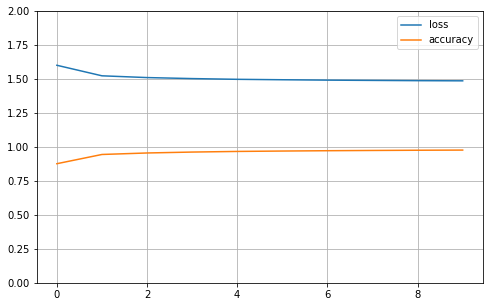

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [21]:
dataFrame_loss_accuracy = pd.DataFrame(history.history)
dataFrame_loss_accuracy 

loss  accuracy
0  1.600645  0.876350
1  1.523115  0.944267
2  1.510115  0.955283
3  1.502687  0.962000
4  1.497312  0.966650
5  1.494153  0.969550
6  1.491251  0.971950
7  1.489296  0.973833
8  1.487381  0.975450
9  1.486165  0.976567

<IPython.core.display.Javascript object>


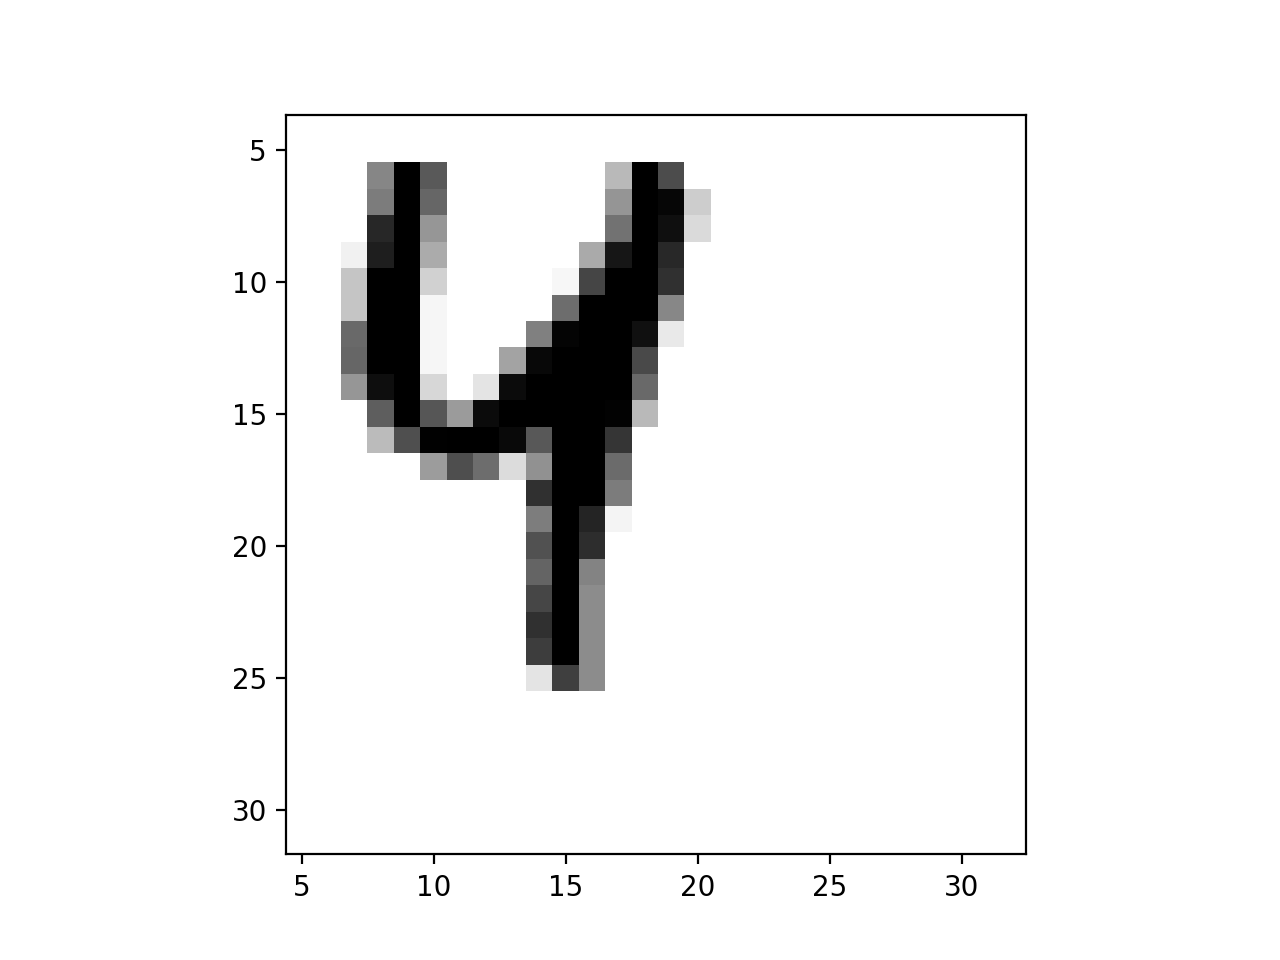

In [10]:
%matplotlib notebook
digit = x_test[42]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [14]:
digit = x_test[42:43]
y_prob = model.predict(digit)
y_prob.round(2)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
y_pred = model.predict_classes(digit)
print(y_pred.round(2))

[4]
